In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
stats_2017_2018 = pd.read_csv('UAEU Stats 2017-2018.csv')
stats_2018_2019 = pd.read_csv('UAEU Stats 2018-2019.csv')
stats_2019_2020 = pd.read_csv('UAEU Stats 2019-2020.csv')

In [4]:
print(stats_2017_2018.head())
print(stats_2018_2019.head())
print(stats_2019_2020.head())

        YEAR                  COLLEGE_DESC GENDER_DESC   NATIONALITY  \
0  2017-2018  Humanities & Social Sciences        Male      National   
1  2017-2018  Humanities & Social Sciences        Male      National   
2  2017-2018  Humanities & Social Sciences        Male      National   
3  2017-2018  Humanities & Social Sciences        Male  Non-National   
4  2017-2018  Humanities & Social Sciences        Male  Non-National   

   STUDENT_LEVEL  TOTAL  
0      Doctorate      4  
1         Master      7  
2  Undergraduate    238  
3      Doctorate      5  
4         Master      1  
        YEAR                  COLLEGE_DESC GENDER_DESC   NATIONALITY  \
0  2018-2019  Humanities & Social Sciences        Male      National   
1  2018-2019  Humanities & Social Sciences        Male      National   
2  2018-2019  Humanities & Social Sciences        Male      National   
3  2018-2019  Humanities & Social Sciences        Male  Non-national   
4  2018-2019  Humanities & Social Sciences        M

In [5]:
def lower_columns(df):
    df.columns = [ x.lower().strip() for x in df.columns]

In [6]:
lower_columns(stats_2017_2018)
lower_columns(stats_2018_2019)
lower_columns(stats_2019_2020)

In [7]:
df_full = pd.merge(stats_2017_2018, stats_2018_2019, how='outer')
df_full = pd.merge(df_full, stats_2019_2020, how='outer')

print(df_full.head())

        year                  college_desc gender_desc   nationality  \
0  2017-2018  Humanities & Social Sciences        Male      National   
1  2017-2018  Humanities & Social Sciences        Male      National   
2  2017-2018  Humanities & Social Sciences        Male      National   
3  2017-2018  Humanities & Social Sciences        Male  Non-National   
4  2017-2018  Humanities & Social Sciences        Male  Non-National   

   student_level  total  
0      Doctorate    4.0  
1         Master    7.0  
2  Undergraduate  238.0  
3      Doctorate    5.0  
4         Master    1.0  


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           318 non-null    object 
 1   college_desc   318 non-null    object 
 2   gender_desc    318 non-null    object 
 3   nationality    318 non-null    object 
 4   student_level  318 non-null    object 
 5   total          318 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.4+ KB


In [9]:
def subject_graphs(a, b, c):
    y = [a, b, c]
    sns.lineplot(x=['2017-2018', '2018-2019', '2019-2020'], y=y)
    plt.show()
    

In [10]:
def num_students_per_subject(subject):
    num_2017_2018_total = stats_2017_2018[stats_2017_2018.college_desc == subject].total.sum()
    num_2018_2019_total = stats_2018_2019[stats_2018_2019.college_desc == subject].total.sum()
    num_2019_2020_total = stats_2019_2020[stats_2019_2020.college_desc == subject].total.sum()
    df_full_total = df_full[df_full.college_desc == subject].total.sum()
    
    print(f"""
          {subject} enrollment in 2017-2018: {num_2017_2018_total}
          {subject} enrollment in 2018-2019: {num_2018_2019_total}
          {subject} enrollment in 2019-2020: {num_2019_2020_total}
          
          Total {subject} enrollment: {df_full_total}
          """)
    
    subject_graphs(num_2017_2018_total, num_2018_2019_total, num_2019_2020_total)
    
    return num_2017_2018_total, num_2018_2019_total, num_2019_2020_total, df_full_total
    

In [11]:
print(df_full.college_desc.value_counts())



Medicine & Health Sciences      41
Humanities & Social Sciences    36
Business & Economics            36
Food & Agriculture              36
Information Technology          36
Science                         35
Education                       34
Engineering                     34
Law                             27
Academic Affairs                 3
Name: college_desc, dtype: int64



          Medicine & Health Sciences enrollment in 2017-2018: 665
          Medicine & Health Sciences enrollment in 2018-2019: 631.0
          Medicine & Health Sciences enrollment in 2019-2020: 635
          
          Total Medicine & Health Sciences enrollment: 1931.0
          


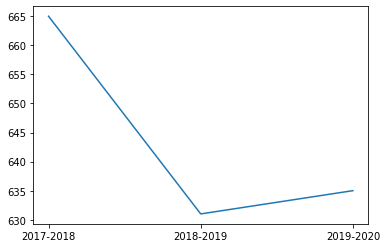

In [12]:
medicine_health_sciences_2017_2018, medical_health_sceinces_2018_2019, medicine_health_sciences_2019_2020, medicine_health_sciences_total  = num_students_per_subject('Medicine & Health Sciences')


          Humanities & Social Sciences enrollment in 2017-2018: 4130
          Humanities & Social Sciences enrollment in 2018-2019: 3948.0
          Humanities & Social Sciences enrollment in 2019-2020: 3429
          
          Total Humanities & Social Sciences enrollment: 11507.0
          


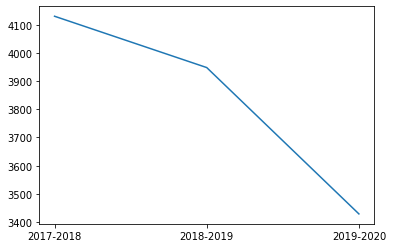

In [13]:
humanities_social_sciences_2017_2018, humanities_social_sciences_2018_2019, humanities_social_sciences_2019_2020, humanities_social_sciences_total  = num_students_per_subject('Humanities & Social Sciences')


          Business & Economics enrollment in 2017-2018: 2143
          Business & Economics enrollment in 2018-2019: 2064.0
          Business & Economics enrollment in 2019-2020: 1760
          
          Total Business & Economics enrollment: 5967.0
          


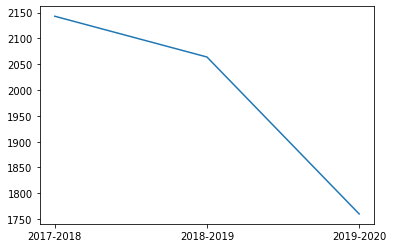

In [14]:
business_economics_2017_2018, business_economics_2018_2019, business_economics_2019_2020, business_economics_total  = num_students_per_subject('Business & Economics')


          Food & Agriculture enrollment in 2017-2018: 757
          Food & Agriculture enrollment in 2018-2019: 738.0
          Food & Agriculture enrollment in 2019-2020: 637
          
          Total Food & Agriculture enrollment: 2132.0
          


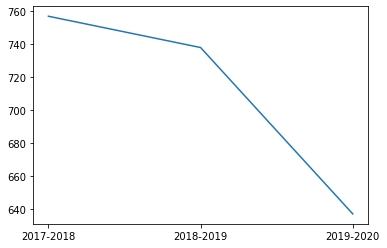

In [15]:
food_agriculture_2017_2018, food_agriculture_2018_2019, food_agriculture_2019_2020, food_agriculture_total  = num_students_per_subject('Food & Agriculture')


          Information Technology enrollment in 2017-2018: 990
          Information Technology enrollment in 2018-2019: 1283.0
          Information Technology enrollment in 2019-2020: 1178
          
          Total Information Technology enrollment: 3451.0
          


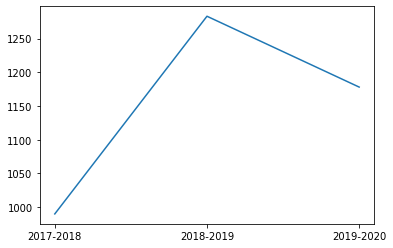

In [16]:
information_technology_2017_2018, information_technology_2018_2019, information_technology_2019_2020, information_technology_total  = num_students_per_subject('Information Technology')


          Science enrollment in 2017-2018: 1417
          Science enrollment in 2018-2019: 1471.0
          Science enrollment in 2019-2020: 1698
          
          Total Science enrollment: 4586.0
          


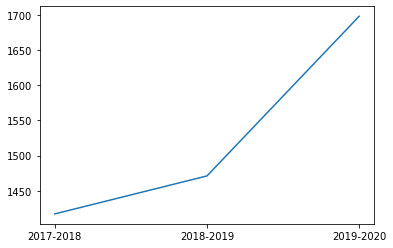

In [17]:
science_2017_2018, science_2018_2019, science_2019_2020, science_total  = num_students_per_subject('Science')


          Education enrollment in 2017-2018: 742
          Education enrollment in 2018-2019: 857.0
          Education enrollment in 2019-2020: 790
          
          Total Education enrollment: 2389.0
          


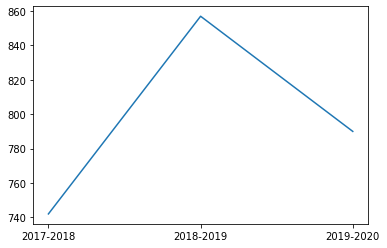

In [18]:
education_2017_2018, education_2018_2019, education_2019_2020, education_total  = num_students_per_subject('Education')


          Engineering enrollment in 2017-2018: 3054
          Engineering enrollment in 2018-2019: 3063.0
          Engineering enrollment in 2019-2020: 2768
          
          Total Engineering enrollment: 8885.0
          


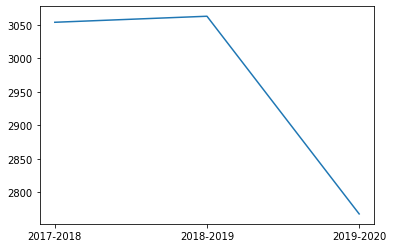

In [19]:
engineering_2017_2018, engineering_2018_2019, engineering_2019_2020, engineering_total  = num_students_per_subject('Engineering')


          Law enrollment in 2017-2018: 1020
          Law enrollment in 2018-2019: 964.0
          Law enrollment in 2019-2020: 781
          
          Total Law enrollment: 2765.0
          


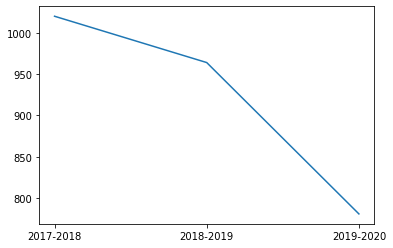

In [20]:
law_2017_2018, law_2018_2019, law_2019_2020, law_total  = num_students_per_subject('Law')


          Academic Affairs enrollment in 2017-2018: 0
          Academic Affairs enrollment in 2018-2019: 0.0
          Academic Affairs enrollment in 2019-2020: 29
          
          Total Academic Affairs enrollment: 29.0
          


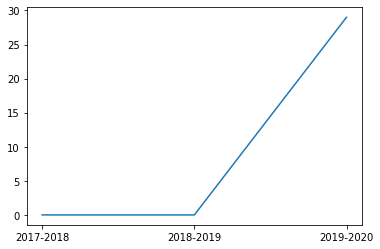

In [21]:
academic_affiars_2017_2018, academic_affiars_2018_2019, academic_affiars_2019_2020, academic_affiars_total  = num_students_per_subject('Academic Affairs')

In [22]:
print(df_full.gender_desc.value_counts())

Female    163
Male      155
Name: gender_desc, dtype: int64
